# 단어 빈도 분석
* 단어 빈도 분석은 전체 문서 또는 문서별 단어 출현빈도를 보여준다. 
* 한글, 영어를 불문하고 불용어들은 사전에 제거한 후 단어 빈도를 분석해야 한다. 
* 단어 빈도는 단어구름(wordcloud) 형태로 많이 표현한다. 

In [1]:
import pandas as pd 
import nltk
from konlpy.tag import Hannanum

#### 한나눔 형태소 분석기 사용

In [2]:
hannanum = Hannanum()

aaa


#### 파일 읽어오기 

In [3]:
f = open("./datas/문재인_연설문.txt", 'r',  encoding='UTF8')
lines = f.readlines()
f.close()

#### 각 라인별로 명사를 추출하기 
* nouns() : 한국어 분석을 할때는 명사 추출 분석이 가장 일반적

In [4]:
temp = []

for i in range(len(lines)):    
    temp.append(hannanum.nouns(lines[i]))   

#### 리스트를 생성하는 함수

In [5]:
def flatten(lst):
    flatList = []
    
    for elem in lst:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    
    return flatList

In [6]:
word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
res = word_list.value_counts().head(10)

In [7]:
print(res)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
국민들      6
나라       6
역사       6
대통령의     5
세상       5
dtype: int64


# 단어 구름
* pip install wordcloud

In [8]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
font_path = "/Utils/Fonts/NanumGothic.ttf"
wordcloud = WordCloud(
    font_path=font_path,
    width = 800, 
    height = 800, 
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

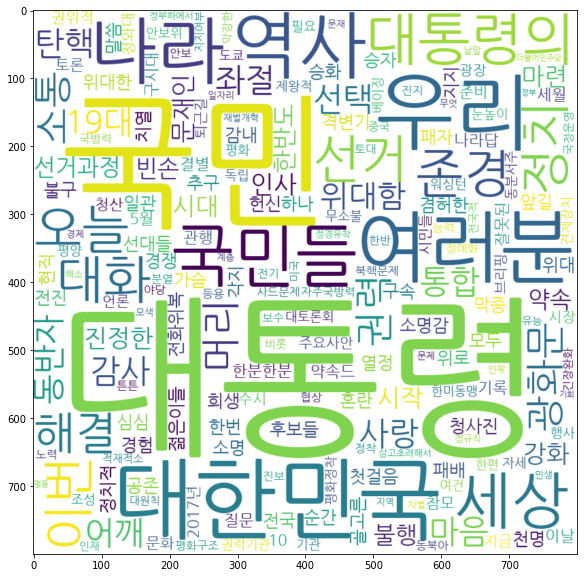

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_kor.png')

# 사진 형상 안에 단어 구름 넣기

In [11]:
from PIL import Image
import numpy as np

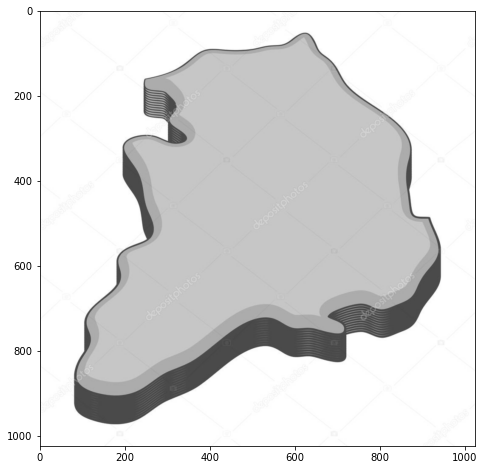

In [12]:
korea_mask = np.array(Image.open("../../Utils/Images/korea_mask2.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(korea_mask, interpolation="bilinear")
plt.show()

In [13]:
count = Counter(word_list)
wc_korea = WordCloud(
    font_path = font_path,
    mask = korea_mask,
    background_color="white"
)
wc_korea = wc_korea.generate_from_frequencies(count)

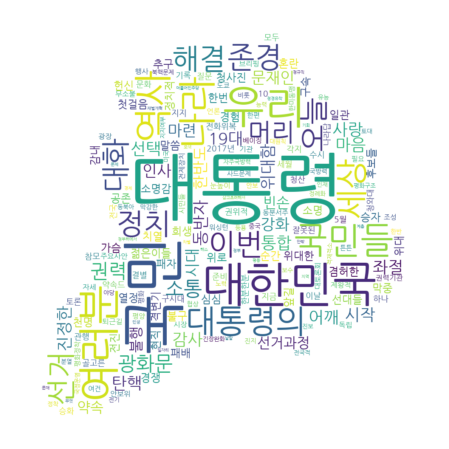

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(wc_korea, interpolation="bilinear")
plt.axis('off')
plt.show()